<font size= "6"> **Impacts/pressures** </font>
<br>
<font size= "4">Case study demonstrator: Impacts of Cyclone Yasi on Hinchinbrook Island, QLD.</font><br>  
<font size= "3">Welcome to the **Living Coasts project**. Here you can find a notebook to search and anlyse the changes (impacts/pressures) occurring on Hinchinbrook Island before and after the event of Cyclone Yasi in 2011.</font> 

<font size = 4>(insert) Paragraph on approach</font>

<font size = "3">**Case Study**</font><br>
<font size="2"> 
- Cyclone Yasi was approximately 700 km in diameter when it crossed the Queensland coast at 12am on the 03/02/2011.
- It produced gusts of up to 290 km/h and wave heights greater than 7 m.
- Rainfall was intensive, leading to the northeast coast of Australia experiencing the second wettest summer on record.
- Significant mangrove damage occurred within the 200 km² area of Hinchinbrook Island (18° 13′ 46° S, 146° 13′ 58° E) in which 17.2% of the mangrove area was damaged.
- The northwest and northeast corners of the island at the most seaward fringe were the most affected areas.</font><br>
<br>

<font size = 4>(insert) High level workflow <br>
Impact --> pressure --> why/what</font>

<font size = "3">**Impact:** Vegetation damage (No. 59), Vegetation loss (extent) (No. 65)</font><br>
<font size = "2"> 59 Vegetation damage: Harm that impairs the value or function of plants or plant communities.<br>
65 Vegetation loss (extent): Loss of vegetation communities from an area.</font><br>
<br>
<font size = "3">**Evidence for impact** (i.e. vegetation damage).</font><br>
<font size = "2"> Loss and/or degradation of vegetation communities from an area. https://github.com/livingearth-system/Globalchangeframework/blob/main/Evidence-Base-for-Change.md</font><br>

<font size = "3"> **Pressures:** Excess rainfall (No. 39), Storm surge (No. 119), Strong winds (No. 120)</font><br> 
<font size = "2"> 39 Excess rainfall: Heavy rainfall associated with the passage of a storm or tropical cyclone than can produce extensive flooding.<br>
119 Storm surge: An abnormal rise in sea level over and above the normal (astronomical) tide levels.<br>
120 Strong winds: A prolonged period of average wind speeds exceeding 40km/h during the day.</font>
   
<font size = "3">**Evidence for pressure** (i.e. increased wind speed)</font>

a) Hinchinbrook Island received excess rainfall, 240mm, on the 3rd of February 2011. The mean rainfall for this area in February is 543.3mm.<br>
    b) Hinchinbrook experienced maximum sustained wind speeds of 205km/h during the cyclone event.<br>
    c) A maximum storm surge of 5.33 meters (2.2 meters above the highest astronomical tide HAT) was recorded at Cardwell on the 3rd of February 2011.<br>
    d) Low atmospheric pressure readings, 930-960 hPa, were recorded during the cyclone event. 


<font size = "3">**Datasets**</font><br>
<br>
<font size = "3">Digital Earth Australia (DEA)</font>
<font size = "2">
- Land cover: looking for any change in L3 and L4 natural terrestrial vegetation.
- Mangroves: looking for any change in mangrove extent.
- Fractional cover: looking for any change in green (PV) vegetation.<br>
<br>

<font size = "3">Bureau of Meteorology (BOM)</font>    
<font size = "2">
- Rainfall.
- Wind speed.
- Atmospheric pressure.

In [4]:
%matplotlib inline

import sys, os

import datacube
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr

from matplotlib import colors as mcolours
from matplotlib.ticker import FuncFormatter
from datacube.utils import masking
from IPython.core.display import Video
from matplotlib.colors import LinearSegmentedColormap

import sys, os
sys.path.insert(1, os.path.abspath('../Tools'))
from dea_tools.plotting import rgb
from dea_tools.plotting import rgb, display_map, xr_animation
from matplotlib import colors as mcolours
from dea_tools.landcover import plot_land_cover, lc_colourmap, make_colorbar


In [5]:
dc = datacube.Datacube(app="DEA_Land_Cover")

<font size = 4>Load AOI: Hinchinbrook Island, QLD.</font>

In [7]:
query = {
    "x": (146.06, 146.37),
    "y": (-18.50, -18.18),
    "time": ("2010", "2011"),
}
display_map(x=query["x"], y=query["y"])

<font size ='4'>Impact detection and visualisation using DEA Land Cover **Level 3**</font><br>

<font size ='3'>Level 3 identifies six base land cover types:
- Cultivated Terrestrial Vegetation
    - percentage of cover
    - life form (herbaceous only)
- Natural Terrestrial Vegetation
    - percentage of cover
    - life form (woody or herbaceous)
- Natural Aquatic Vegetation
    - percentage of cover
    - life form (woody or herbaceous)
    - water seasonality
- Artificial Surfaces
- Natural Bare
    - percentage of bare cover
- Aquatic
    - water persistence
    - intertidal area<br>
    
Evidence of impacts No. 59 vegetation damage and No. 63 vegetation loss (extent) is most likely to be detected as change within the Natural Aquatic and Natural Terrestrial Vegetation classifications.</font> 

In [8]:
# Load DEA Land Cover L3 data from the datacube
lc = dc.load(
    product="ga_ls_landcover_class_cyear_2",
    output_crs="EPSG:3577",
    measurements=[
        "level3",
        "lifeform",
        "vegetation_cover",
        "water_seasonality",
        "water_state",
        "intertidal",
        "water_persistence",
        "bare_gradation",
        "full_classification",
    ],
    resolution=(-25, 25),
    **query
)

In [9]:
lc

<xarray.Dataset> Size: 41MB
Dimensions:              (time: 2, y: 1556, x: 1460)
Coordinates:
  * time                 (time) datetime64[ns] 16B 2010-01-01 2011-01-01
  * y                    (y) float64 12kB -2.024e+06 -2.024e+06 ... -2.063e+06
  * x                    (x) float64 12kB 1.48e+06 1.48e+06 ... 1.516e+06
    spatial_ref          int32 4B 3577
Data variables:
    level3               (time, y, x) uint8 5MB 220 220 220 220 ... 220 220 220
    lifeform             (time, y, x) uint8 5MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    vegetation_cover     (time, y, x) uint8 5MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    water_seasonality    (time, y, x) uint8 5MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    water_state          (time, y, x) uint8 5MB 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    intertidal           (time, y, x) uint8 5MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    water_persistence    (time, y, x) uint8 5MB 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    bare_gradation       (time, y, x) uint8 5MB 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    full_classification  (time, y, x) uint8 5MB 101 101 101 101 ... 101 101 101
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

<font size = "3.5"> Define functions for area calculation and change detection analysis.</font>

In [42]:
def calculate_area(data, colour_scheme, resolution):
    # Extract unique classification values and their counts
    unique, counts = np.unique(data, return_counts=True)
    
    # Create a dictionary for the areas
    areas = {}
    
   # Calculate the area for each classification
    for value, count in zip(unique, counts):
        if value in colour_scheme:
            classification_name = colour_scheme[value][-1]
            # Area calculation: count of pixels * (pixel width * pixel height) in square kilometers
            area = (count * (resolution[0] * resolution[1])) / 1_000_000  # Convert to km^2
            areas[classification_name] = area
            
    return areas

def calculate_area_per_time(data, colour_scheme, resolution):
    time_areas = {}
    
    for t in range(len(data.time)):
        time_step = data.isel(time=t).values
        areas = calculate_area(time_step, colour_scheme, resolution)
        time_areas[str(data.time[t].values)] = areas
        
    return time_areas

def calculate_change(timestep_1, timestep_2):
    changes = {}
    
    for classification, area_2 in timestep_2.items():
        area_1 = timestep_1.get(classification, 0)
        change_percent = ((area_2 - area_1) / area_1) * 100 if area_1 != 0 else 100
        changes[classification] = change_percent
        
    return changes

# Define the calculate_area_per_time function
def calculate_area_per_time(data, resolution):
    time_areas = {}
    for t in range(len(data.time)):
        time_step = data.isel(time=t).values
        areas = calculate_area(time_step, resolution)
        time_areas[str(data.time[t].values)] = areas
    return time_areas

# Define the calculate_area function
def calculate_area(data, resolution):
    unique, counts = np.unique(data, return_counts=True)
    areas = {}
    for value, count in zip(unique, counts):
        if value != 255:  # Exclude nodata value
            area = (count * (resolution[0] * resolution[1])) / 1_000_000  # Convert to km^2
            areas[value] = area
    return areas

# Calculate change from timestep 1 to timestep 2
def calculate_change(area_1, area_2):
    change = {}
    for cls in area_1.keys():
        if cls in area_2:
            change[cls] = ((area_2[cls] - area_1[cls]) / area_1[cls]) * 100
        else:
            change[cls] = np.nan  # Handle case where classification is missing in the second timestep
    return change

<font size = "3.5"> Plot and calculate areas for the L3 classification before (2010) and after (2011) Cyclone Yasi.</font>

                                   2010-01-01T00:00:00.000000000  \
Area km2                                                           
No Data                                                 1.402500   
Cultivated terrestrial vegetation                       6.195625   
Natural terrestrial vegetation                        533.371875   
Natural aquatic vegetation                            168.537500   
Artificial surface                                      0.070000   
Natural bare surface                                    1.118750   
Water                                                 709.153750   

                                   2011-01-01T00:00:00.000000000  \
Area km2                                                           
No Data                                                  0.06750   
Cultivated terrestrial vegetation                        5.87125   
Natural terrestrial vegetation                         536.87125   
Natural aquatic vegetation                     

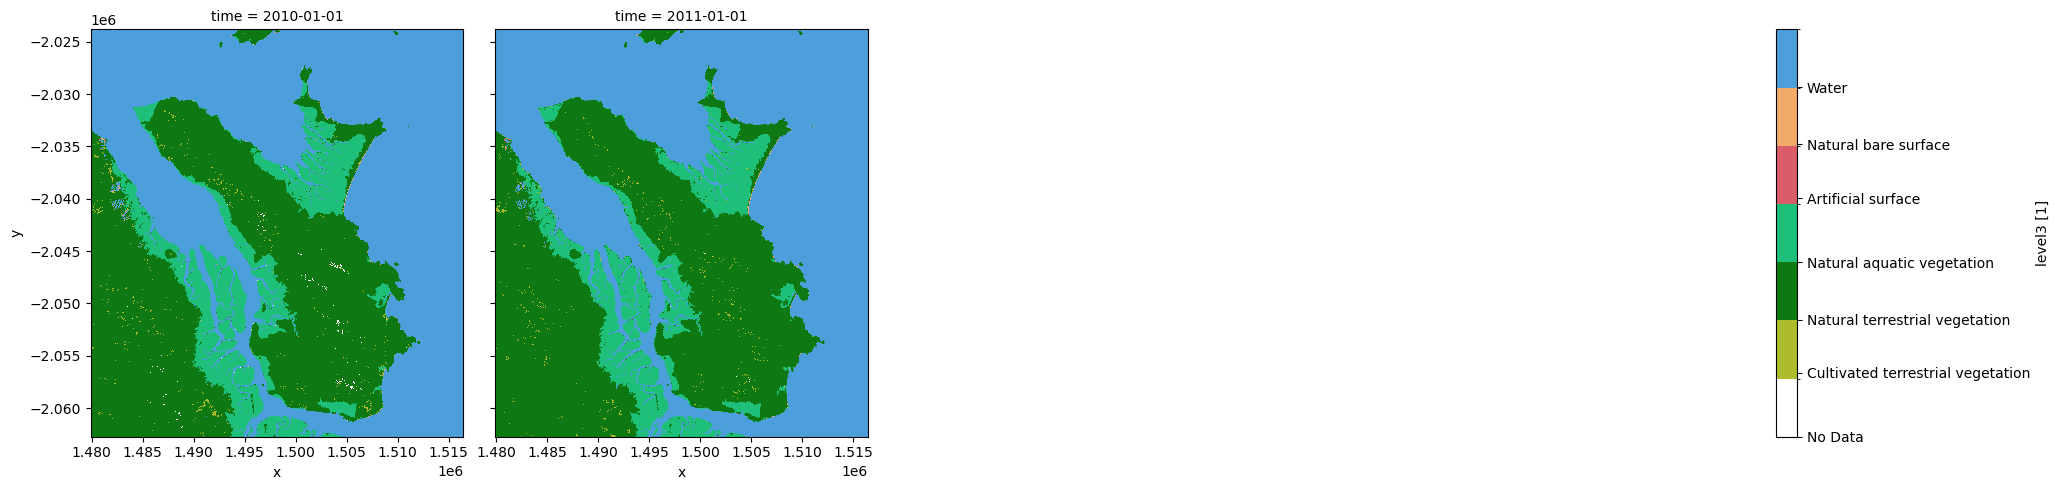

In [13]:
# Define a colour scheme for the Level 3
LEVEL3_COLOUR_SCHEME = {
    0: (255, 255, 255, 255, "No Data"),
    111: (172, 188, 45, 255, "Cultivated terrestrial vegetation"),
    112: (14, 121, 18, 255, "Natural terrestrial vegetation"),
    124: (30, 191, 121, 255, "Natural aquatic vegetation"),
    215: (218, 92, 105, 255, "Artificial surface"),
    216: (243, 171, 105, 255, "Natural bare surface"),
    220: (77, 159, 220, 255, "Water"),
}

# Plot layer from colour map
def plot_layer(colours, data):
    colour_arr = []
    ticks = []
    labels = []

    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2]) / 255)
        ticks.append(key)
        labels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours.keys())
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)

    def format_func(value, tick_number):
        if value in ticks:
            return labels[ticks.index(value)]
        else:
            return ''

    cbar_kwargs = {
        'ticks': ticks,
        'format': FuncFormatter(format_func)
    }

    if len(data.time) == 1:
        # Plot the provided layer
        im = data.isel(time=0).plot(
            cmap=cmap, norm=norm, add_colorbar=True, size=5, cbar_kwargs=cbar_kwargs
        )
    else:
        # Plot the provided layer
        im = data.plot(
            cmap=cmap, norm=norm, add_colorbar=True, col="time", col_wrap=4, size=5, cbar_kwargs=cbar_kwargs
        )

    return im

plot_layer(LEVEL3_COLOUR_SCHEME, lc.level3)

# Define lc.level3 resolution
resolution = (25, 25)  # Pixel resolution in meters

# Calculate area for each time step
area_land_cover = calculate_area_per_time(lc.level3, LEVEL3_COLOUR_SCHEME, resolution)

# Extract areas for each year
years = sorted(area_land_cover.keys())
areas_df = pd.DataFrame(area_land_cover)

# Calculate change from timestep 1 to timestep 2
if len(years) >= 2:
    change_from_1_to_2 = calculate_change(area_land_cover[years[0]], area_land_cover[years[1]])
    change_df = pd.DataFrame(change_from_1_to_2, index=['Change in percent from Year 1 to Year 2']).T
else:
    change_df = pd.DataFrame(columns=area_df.columns)

# Create the final table
final_df = pd.concat([areas_df, change_df], axis=1)

# Reorder the rows according to your specification
final_df = final_df.reindex(['No Data',  'Cultivated terrestrial vegetation', 'Natural terrestrial vegetation','Natural aquatic vegetation','Artificial surface','Natural bare surface','Water'])

# Define the title with "Area km2"
area_km2_title = f"Area km2"

# Display the result with title
print(final_df.rename_axis(area_km2_title))

<font size = "3.5"><span style="color:red">No change detected in Natural Terrestrial Vegetation (0.6%) and Natural Aquatic Vegetation (-1.75%) L3 classifications.</span></font>


<font size = "4" >Impact detection and visualisation using Land Cover **Level 4**</font>

<font size ='3'>Level 4 utilises additional environmental descriptors to better describe level 3 classifications. This analysis will look at:
- Lifeform (Natural Terrestrial Vegetated)
    - woody
    - herbaceous
- Vegetation Cover (Vegetated)
    - greater than 65 % cover
    - 40 to 65 % cover
    - 15 to 40 % cover
    - 4 to 15 % cover
    - 1 to 4 % cover
    

<font size = 4 >**Lifeform**</font><br>

<font size=3>Plot and calculate areas for the L4 Lifeform classification before (2010) and after (2011) Cyclone Yasi.</font>

                         2010-01-01T00:00:00.000000000  \
Area km2                                                 
No Data / Not vegetated                      1024.9128   
Woody Vegetation                              989.0955   
Herbaceous Vegetation                          30.5757   

                         2011-01-01T00:00:00.000000000  \
Area km2                                                 
No Data / Not vegetated                      1024.6068   
Woody Vegetation                              931.5900   
Herbaceous Vegetation                          88.3872   

                         Change in percent from Year 1 to Year 2  
Area km2                                                          
No Data / Not vegetated                                -0.029856  
Woody Vegetation                                       -5.813948  
Herbaceous Vegetation                                 189.076620  


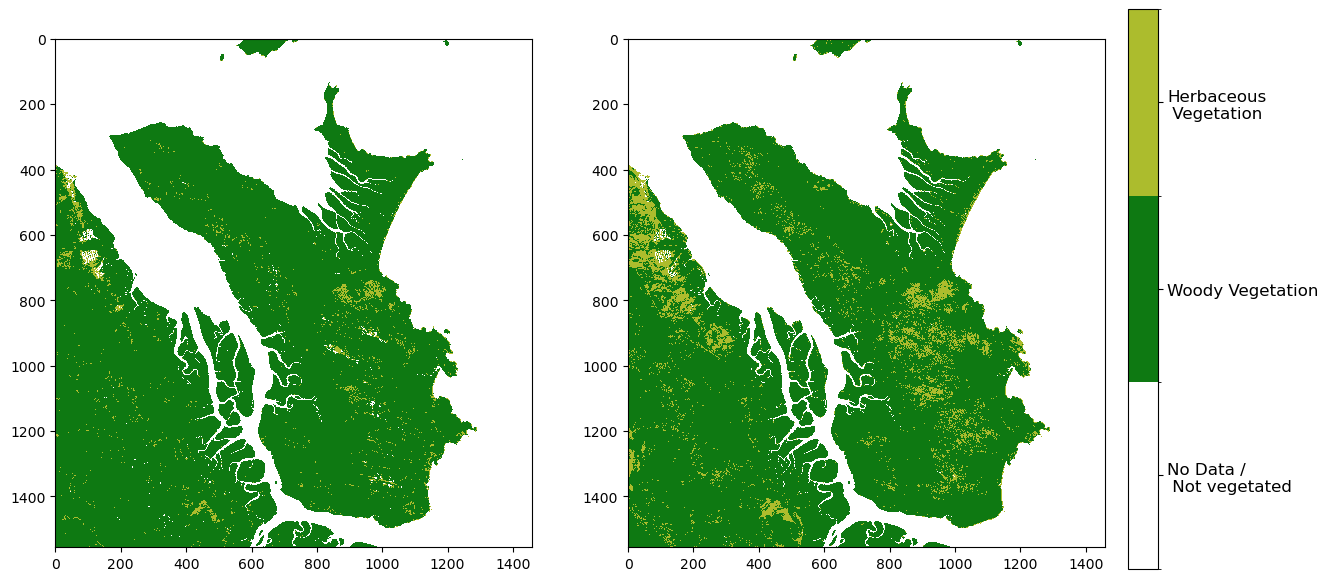

In [22]:
plot_land_cover(lc.lifeform)

# Define the colour scheme for lc.lifeform
LIFEFORM_COLOUR_SCHEME = {
    0: (255, 255, 255, 255, "No Data / Not vegetated"),
    1: (14, 121, 18, 255, "Woody Vegetation"),
    2: (172, 188, 45, 255, "Herbaceous Vegetation"),
}

# Calculate area for each year for lc.lifeform
time_areas_lifeform = calculate_area_per_time(lc.lifeform, LIFEFORM_COLOUR_SCHEME, resolution)

# Extract areas for each year
years = sorted(time_areas_lifeform.keys())
areas_df = pd.DataFrame(time_areas_lifeform)

# Calculate change from timestep 1 to timestep 2
if len(years) >= 2:
    change_from_1_to_2 = calculate_change(time_areas_lifeform[years[0]], time_areas_lifeform[years[1]])
    change_df = pd.DataFrame(change_from_1_to_2, index=['Change in percent from Year 1 to Year 2']).T
else:
    change_df = pd.DataFrame(columns=areas_df.columns)

# Create the final table
final_df = pd.concat([areas_df, change_df], axis=1)

# Reorder the rows according to your specification
final_df = final_df.reindex(['No Data / Not vegetated', 'Woody Vegetation', 'Herbaceous Vegetation'])

# Display the result with the modified title
print(final_df.rename_axis(area_km2_title))


<font size = 3><span style="color:red">Changes in herbaceous vegetation does not reflect the mangrove areas that were damaged by Cyclone Yasi.</span></font>

<font size = 4 >**Vegetation Cover**</font><br>

<font size=3>Plot and calculate areas for the L4 Vegetation Cover classification before (2010) and after (2011) Cyclone Yasi.</font>

                         2010-01-01T00:00:00.000000000  \
Area km2                                                 
No Data / Not vegetated                            NaN   
> 65 % cover                                 602.59750   
40 to 65 % cover                              89.95250   
15 to 40 % cover                               6.85625   
4 to 15 % cover                                0.45875   
1 to 4 % cover                                 8.24000   

                         2011-01-01T00:00:00.000000000  \
Area km2                                                 
No Data / Not vegetated                            NaN   
> 65 % cover                                 437.02125   
40 to 65 % cover                             244.28125   
15 to 40 % cover                              25.23000   
4 to 15 % cover                                1.52750   
1 to 4 % cover                                 0.25750   

                         Change in percent from Year 1 to Year 2  
Are

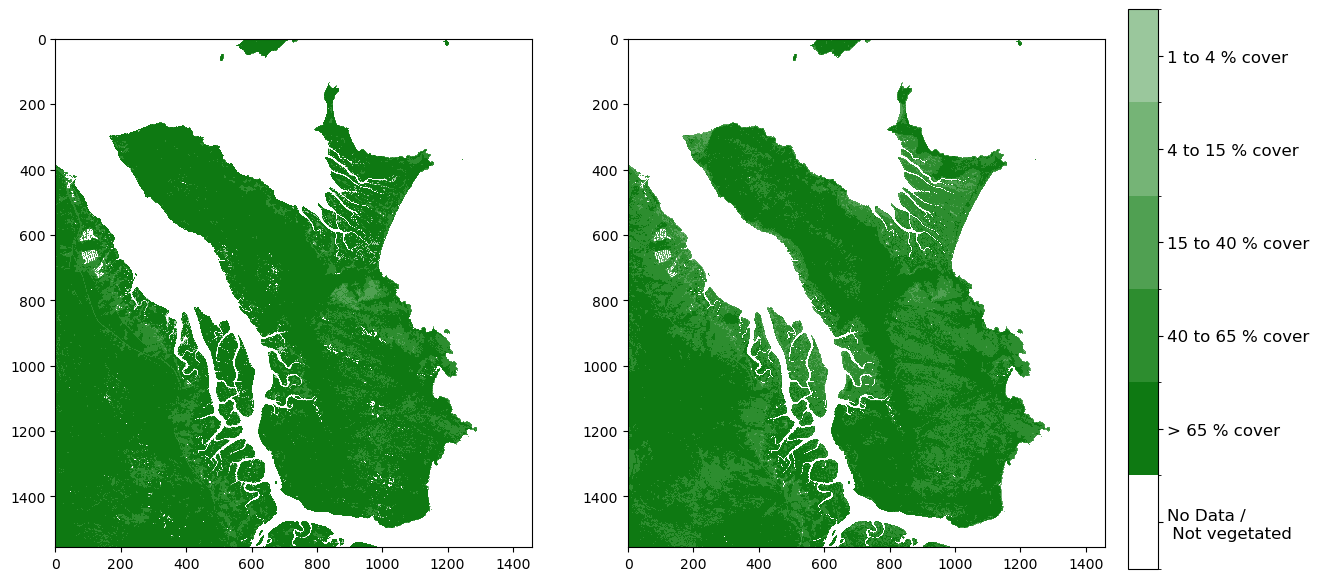

In [23]:
plot_land_cover(lc.vegetation_cover)

# Define the colour scheme for lc.vegetation_cover
Vegetation_cover_COLOUR_SCHEME = {
    0: (255, 255, 255, 255, "No Data /\n Not vegetated"),  # White for No Data / Not vegetated
    10: (0, 100, 0, 255, "> 65 % cover"),                  # Dark Green for > 65 % cover
    12: (34, 139, 34, 255, "40 to 65 % cover"),             # Forest Green for 40 to 65 % cover
    13: (154, 205, 50, 255, "15 to 40 % cover"),            # Yellow Green for 15 to 40 % cover
    15: (255, 165, 0, 255, "4 to 15 % cover"),              # Orange for 4 to 15 % cover
    16: (255, 69, 0, 255, "1 to 4 % cover")                 # Red for 1 to 4 % cover
}

# Calculate area for each year for lc.vegetation cover
time_areas_vegetation_cover = calculate_area_per_time(lc.vegetation_cover, Vegetation_cover_COLOUR_SCHEME , resolution)

# Extract areas for each year
years = sorted(time_areas_vegetation_cover.keys())
areas_df = pd.DataFrame(time_areas_vegetation_cover)

# Calculate change from timestep 1 to timestep 2
if len(years) >= 2:
    vegetation_cover_change_from_1_to_2 = calculate_change(time_areas_vegetation_cover[years[0]],time_areas_vegetation_cover[years[1]])
    change_df = pd.DataFrame(vegetation_cover_change_from_1_to_2, index=['Change in percent from Year 1 to Year 2']).T
else:
    change_df = pd.DataFrame(columns=areas_df.columns)
    
# Concatenate the area DataFrame and the change DataFrame
final_df = pd.concat([areas_df, change_df], axis=1)


# Reorder the rows according to your specification
final_df = final_df.reindex(['No Data / Not vegetated', '> 65 % cover', '40 to 65 % cover', '15 to 40 % cover', '4 to 15 % cover', '1 to 4 % cover'])

# Display the result with the modified title
print(final_df.rename_axis(area_km2_title))

<font size = 3><span style="color:red">The changes in vegetation cover from more than 65% to 15-40% on the northwestern tip of the island and in the northeastern estuary region reflect the mangrove areas damaged by Cyclone Yasi.</span></font>

<font size = "4">**DEA Mangroves**</font><br>

<font size = "3">In this product mangroves are identified by leveraging a relationship between the 10th percentile green vegetation component of the DEA [Fractional Cover](https://knowledge.dea.ga.gov.au/data/product/dea-fractional-cover-landsat) data product with Light Detection And Ranging (LiDAR)-derived Planimetric Canopy Cover% (PCC).

Three cover classes are identified within the product which are defined as:

* Closed Forest -  pixels with more than 80 % mangrove canopy cover
* Open Forest - pixels with between 50 % and 80 % canopy cover
* Woodland - pixels with between 20 % and 50 % canopy cover</font>


> **Note:** For more technical information about DEA Mangroves, visit the official [Geoscience Australia DEA Mangroves Product Description](https://knowledge.dea.ga.gov.au/data/product/dea-mangrove-canopy-cover-landsat/?tab=overview).
 

In [15]:
dc = datacube.Datacube(app="DEA_Mangroves")

In [16]:
mangroves = dc.load(product="ga_ls_mangrove_cover_cyear_3", **query)
mangroves

<xarray.Dataset> Size: 3MB
Dimensions:             (time: 2, y: 1296, x: 1216)
Coordinates:
  * time                (time) datetime64[ns] 16B 2010-07-02T11:59:59.999999 ...
  * y                   (y) float64 10kB -2.024e+06 -2.024e+06 ... -2.063e+06
  * x                   (x) float64 10kB 1.48e+06 1.48e+06 ... 1.516e+06
    spatial_ref         int32 4B 3577
Data variables:
    canopy_cover_class  (time, y, x) uint8 3MB 255 255 255 255 ... 255 255 255
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

<font size=3>Plot and calculate areas for the DEA Mangroves classification before (2010) and after (2011) Cyclone Yasi.</font>

In [37]:
mangroves.canopy_cover_class

<xarray.DataArray 'canopy_cover_class' (time: 2, y: 1296, x: 1216)> Size: 3MB
array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)
Coordinates:
  * time         (time) datetime64[ns] 16B 2010-07-02T11:59:59.999999 2011-07...
  * y            (y) float64 10kB -2.024e+06 -2.024e+06 ... -2.063e+06
  * x            (x) float64 10kB 1.48e+06 1.48e+06 ... 1.516e+06 1.516e+06
    spatial_ref  int32 4B 3577
Attributes:
    units:             1
    nodata:            255
    flags_definition:  {'woodland': {'bits': [0, 1, 2, 3, 4, 5, 6, 7], 'value...
    crs:               EPSG:3577
    grid_mapping:      spatial_ref

            2010-07-02T11:59:59.999999000  2011-07-02T11:59:59.999999000  \
Area (km2)                                                                 
0.0                                0.0648                         0.0045   
1.0                                3.7332                        35.4780   
2.0                               46.8828                       103.7466   
3.0                              117.6795                        27.5319   
NaN                                   NaN                            NaN   

            Change in percent from Year 1 to Year 2  
Area (km2)                                           
0.0                                      -93.055556  
1.0                                      850.337512  
2.0                                      121.289257  
3.0                                      -76.604336  
NaN                                             NaN  


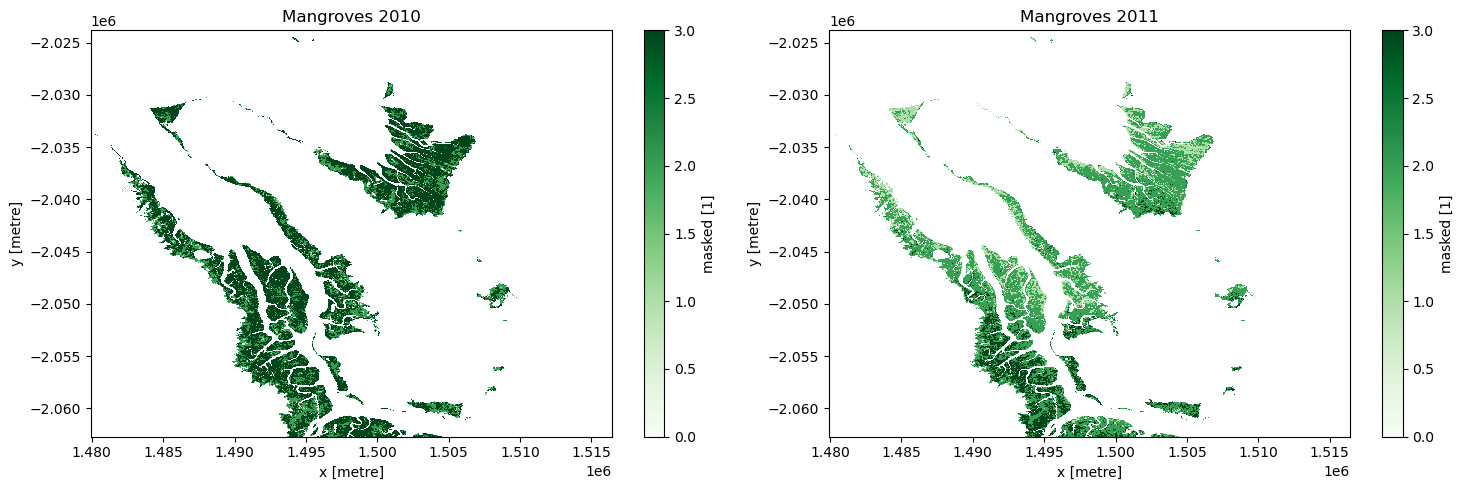

In [40]:
# Mask out the nodata values (assuming 255 is the nodata value)
mangroves["masked"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class != 255)

# Resolution in meters (e.g., pixel resolution)
resolution = (30, 30)

# Calculate area for each year for mangroves based on the masked variable
area_mangroves = calculate_area_per_time(mangroves["masked"], resolution)

# Extract areas for each year into a DataFrame
years = sorted(area_mangroves.keys())
areas_df = pd.DataFrame(area_mangroves)

# Initialize change DataFrame
change_df = pd.DataFrame(columns=areas_df.columns)

# Calculate change
if len(years) >= 2:
    mangrove_cover_change_from_1_to_2 = calculate_change(area_mangroves[years[0]], area_mangroves[years[1]])
    change_df = pd.DataFrame(mangrove_cover_change_from_1_to_2, index=['Change in percent from Year 1 to Year 2']).T

# Reset index of areas_df and change_df
areas_df = areas_df.reset_index(drop=True)
change_df = change_df.reset_index(drop=True)

# Concatenate the area DataFrame and the change DataFrame for mangroves
final_df_mangroves = pd.concat([areas_df, change_df], axis=1)

# Reorder the rows according to your specification for mangroves
reorder_list_mangroves = sorted(np.unique(mangroves["masked"].values))
final_df_mangroves = final_df_mangroves.reindex(reorder_list_mangroves)

# Display the result with the modified title for mangroves
print(final_df_mangroves.rename_axis("Area (km2)"))

# Plot both time steps
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Plot the first time step
mangroves["masked"].isel(time=0).plot(ax=axs[0], cmap="Greens")
axs[0].set_title("Mangroves 2010")

# Plot the most recent time step
mangroves["masked"].isel(time=-1).plot(ax=axs[1], cmap="Greens")
axs[1].set_title("Mangroves 2011")

plt.tight_layout()
plt.show()


<font size = 3><span style="color:red">Significant decrease (76%) of 3.0 Closed Forest.</span></font>

<font size = 4>Plot the area (number of pixels) occupied by each class before and after Cyclone Yasi.</font>

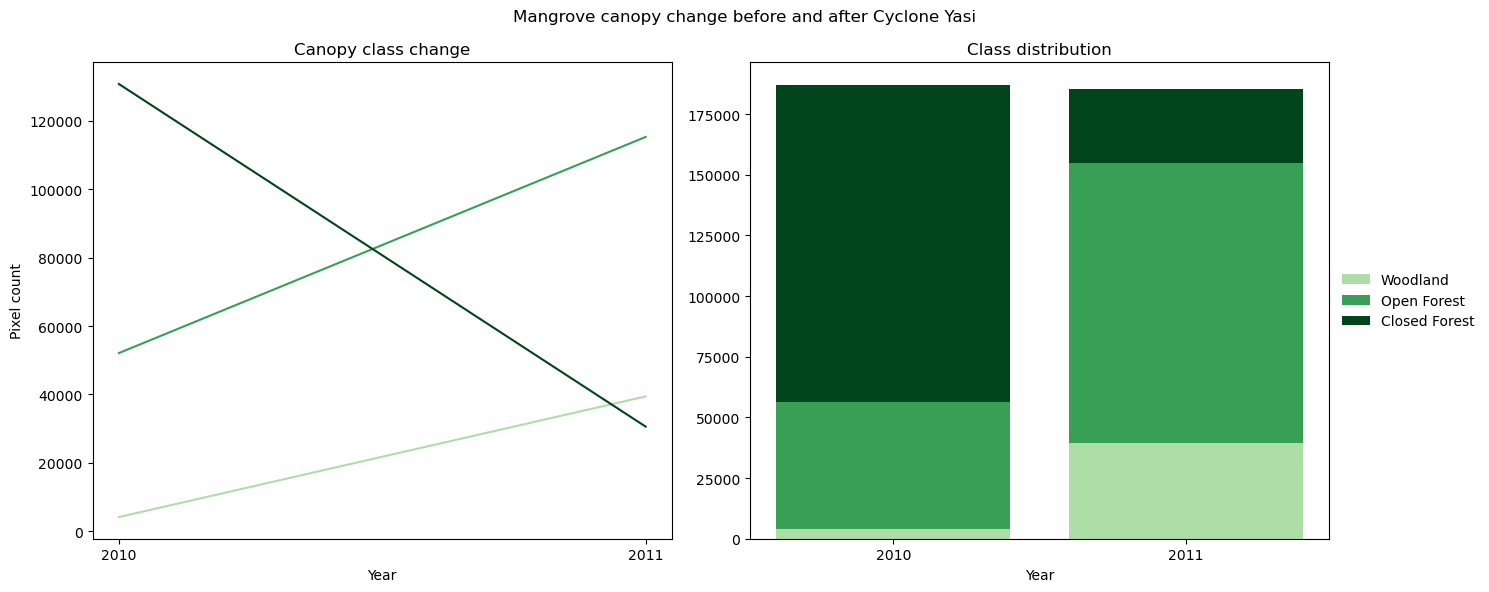

In [43]:
# Set up the data for plotting: count the number of pixels per class in the loaded location
mangroves["closed_forest"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 3)
mangroves["open_forest"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 2)
mangroves["woodland"] = mangroves.canopy_cover_class.where(mangroves.canopy_cover_class == 1)

y1 = mangroves["woodland"].count(dim=["y", "x"])
y2 = mangroves["open_forest"].count(dim=["y", "x"])
y3 = mangroves["closed_forest"].count(dim=["y", "x"])

# Simplify the date labels for the x-axis
x = np.arange(int(query["time"][0].split('-')[0]), int(query["time"][-1].split('-')[0]) + 1, 1)

# Prepare the figures
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("Mangrove canopy change before and after Cyclone Yasi")

# Plot the single class summaries
axs[0].plot(x, y1, color="#aedea7", label="Woodland")
axs[0].plot(x, y2, color="#37a055", label="Open Forest")
axs[0].plot(x, y3, color="#00441b", label="Closed Forest")
axs[0].set_title("Canopy class change")
axs[0].set(ylabel="Pixel count", xlabel="Year")
axs[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Stack the classes to plot a snapshot of the region at each time step
axs[1].bar(x, y1, color="#aedea7", label="Woodland")
axs[1].bar(x, y2, color="#37a055", label="Open Forest", bottom=y1)
axs[1].bar(x, y3, color="#00441b", label="Closed Forest", bottom=(y1 + y2))
axs[1].legend(bbox_to_anchor=(1.0, 0.5), loc="center left", frameon=False)
axs[1].set_title("Class distribution")
axs[1].set(xlabel="Year")
axs[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


<font size = 3><span style="color:red">Vegetation damage and extent loss evident in change from closed forest to open forest and woodland.</span></font>

<font size = "4">**DEA Fractional Cover**</font><br>

<font size ="3">Digital Earth Australia (DEA) Fractional Cover splits landscape observation data into three parts — or fractions — enabling measurement of green (leaves, grass, and growing crops), brown (branches, dry grass or hay, and dead leaf litter), and bare ground (soil or rock) in any area of Australia at any time since 1986. </font>

> **Note:** For more technical information about DEA Fractional Cover, visit the official [Geoscience Australia DEA Fractional Cover product description](https://knowledge.dea.ga.gov.au/data/product/dea-fractional-cover-landsat).

<font size = 3>Summary on impact detection:
- What was it?
- Was it detected (yes,no)
- area/quantitative analysis.</font>

<font size = 3>Text on potential pressures:
    - List from Richard.
    Is this where this should go?<br>
    
    
**Pressures:** Excess rainfall (No. 39), Storm surge (No. 119), Strong winds (No. 120)</font><br> 
<font size = "2"> 39 Excess rainfall: Heavy rainfall associated with the passage of a storm or tropical cyclone than can produce extensive flooding.<br>
119 Storm surge: An abnormal rise in sea level over and above the normal (astronomical) tide levels.<br>
120 Strong winds: A prolonged period of average wind speeds exceeding 40km/h during the day.</font>

<font size = 3>Text about data issues/availability
    - only going to be able to infer from data available</font>

<font size = 4>Pressures<br>
    
    1. Windspeed
    - What it is and data source
    - Cyclone windspeed categories.</font> 
    

<font size = 3>
-Bring data in.<br>
- Rewrite to fit AOI<br>
- xr.where<br>
-Raster = windspeed categories<br>
-Impact dataset == pressure dataset<br>
- Output of % pixels of impact that are considered cyclone pixels.<br> 